## 6.6. 卷积神经网络（LeNet）

LeNet，是最早发布的卷积神经网络之一，因其在计算机视觉任务中的高效性能而受到广泛关注。 这个模型是由AT&T贝尔实验室的研究员Yann LeCun在1989年提出的（并以其命名），目的是识别图像 ([LeCun et al., 1998](https://ieeexplore.ieee.org/document/726791))中的手写数字。

### 6.6.1. LeNet

卷积编码器：由两个卷积层组成;

全连接层密集块：由三个全连接层组成。

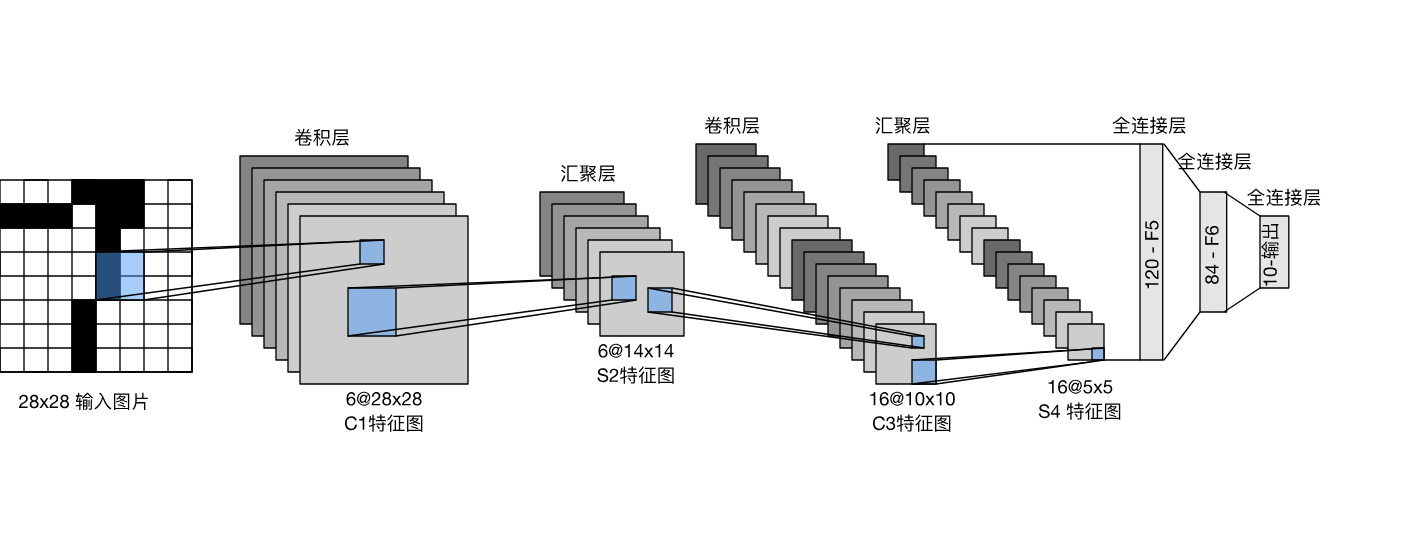

每个卷积块中的基本单元是一个卷积层($5\times 5$)、一个sigmoid激活函数和平均汇聚层($2\times 2$)

**卷积的输出形状由批量大小、通道数、高度、宽度决定。**

### 6.6.3. 小结

卷积神经网络（CNN）是一类使用卷积层的网络。

在卷积神经网络我们组合使用卷积层、非线性激活函数和汇聚层。

为了构造高性能的卷积神络，我们通常对卷积层进行排**列，逐渐降低其表示的空**间分辨**率，同时增**加通道数。

在传统的卷积神经网络中，卷积块编码得到的表征在输出之前需由一个或多个全连接层进行处理。

LeNet是最早发布的卷积神经网络之一

### 6.6.4. 练习

1. 将平均汇聚层替换为最大汇聚层，会发生什么？

2. 尝试构建一个基于LeNet的更复杂的网络，以提高其准确性。
   
    1. 调整卷积窗口大小。
    2. 调整输出通道的数量。
    3. 调整激活函数（如ReLU）。
    4. 调整卷积层的数量。
    5. 调整全连接层的数量。
    6. 调整学习率和其他训练细节（例如，初始化和轮数）。
        
4. 在MNIST数据集上尝试以上改进的网络。
   
5. 显示不同输入（例如毛衣和外套）时，LeNet第一层和第二层的激活值。


In [4]:
import torch
import torchvision
from torch.utils.data import DataLoader

from model.model_LeNet import LeNet_my

net = LeNet_my()

model = torch.load("./model/LeNet_my-num_epochs=10.pth")
net.load_state_dict(model)

<All keys matched successfully>

In [10]:
train_sets = torchvision.datasets.FashionMNIST('./data', train=True, transform=torchvision.transforms.ToTensor(),
                                               download=True)
test_sets = torchvision.datasets.FashionMNIST('./data', train=False, transform=torchvision.transforms.ToTensor(),
                                              download=True)

In [14]:
img_0, label_0 = train_sets[0]
img_1, label_1 = train_sets[1]
label_0, label_1

(9, 0)

In [15]:
net

LeNet_my(
  (net): Sequential(
    (0): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): Sigmoid()
    (2): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): Sigmoid()
    (5): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (6): Flatten(start_dim=1, end_dim=-1)
    (7): Linear(in_features=400, out_features=120, bias=True)
    (8): Sigmoid()
    (9): Linear(in_features=120, out_features=84, bias=True)
    (10): Linear(in_features=84, out_features=10, bias=True)
  )
)

In [17]:
img_0.shape

torch.Size([1, 28, 28])

In [42]:
for name, param in net[0].named_parameters():
    print(name, param.size())

TypeError: 'LeNet_my' object is not subscriptable

In [41]:
net[0]

TypeError: 'LeNet_my' object is not subscriptable